In [6]:
#Title & Objective - Exploratory Data Analysis (EDA)  Extract insights using visual and statistical exploration.
#Dataset (source, rows x cols) - titanic.csv 893*12
#Imports & settings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os


In [7]:
#Load data & quick peek
# Change file path as needed
data_path = "C:\\Users\\divyashree\\OneDrive\\Documents\\elevate lab taks\\task 5\\titanic task5.csv" 
df = pd.read_csv(data_path)

# Quick checks
print("Shape:", df.shape)
display(df.head())
display(df.info())
display(df.describe(include='all').T)


Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [12]:
#Clean column names & duplicates
# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop exact duplicates (if any)
dup_count = df.duplicated().sum()
print(f"Duplicate rows: {dup_count}")
df = df.drop_duplicates()

Duplicate rows: 0


In [14]:
#Missing values overview
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean()*100).sort_values(ascending=False)
pd.concat([missing, missing_percent], axis=1, keys=['missing_count','missing_percent'])


,missing_count,missing_percent
cabin,687,77.104377
age,177,19.865320
embarked,2,0.224467
passengerid,0,0.000000
survived,0,0.000000
pclass,0,0.000000
name,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000


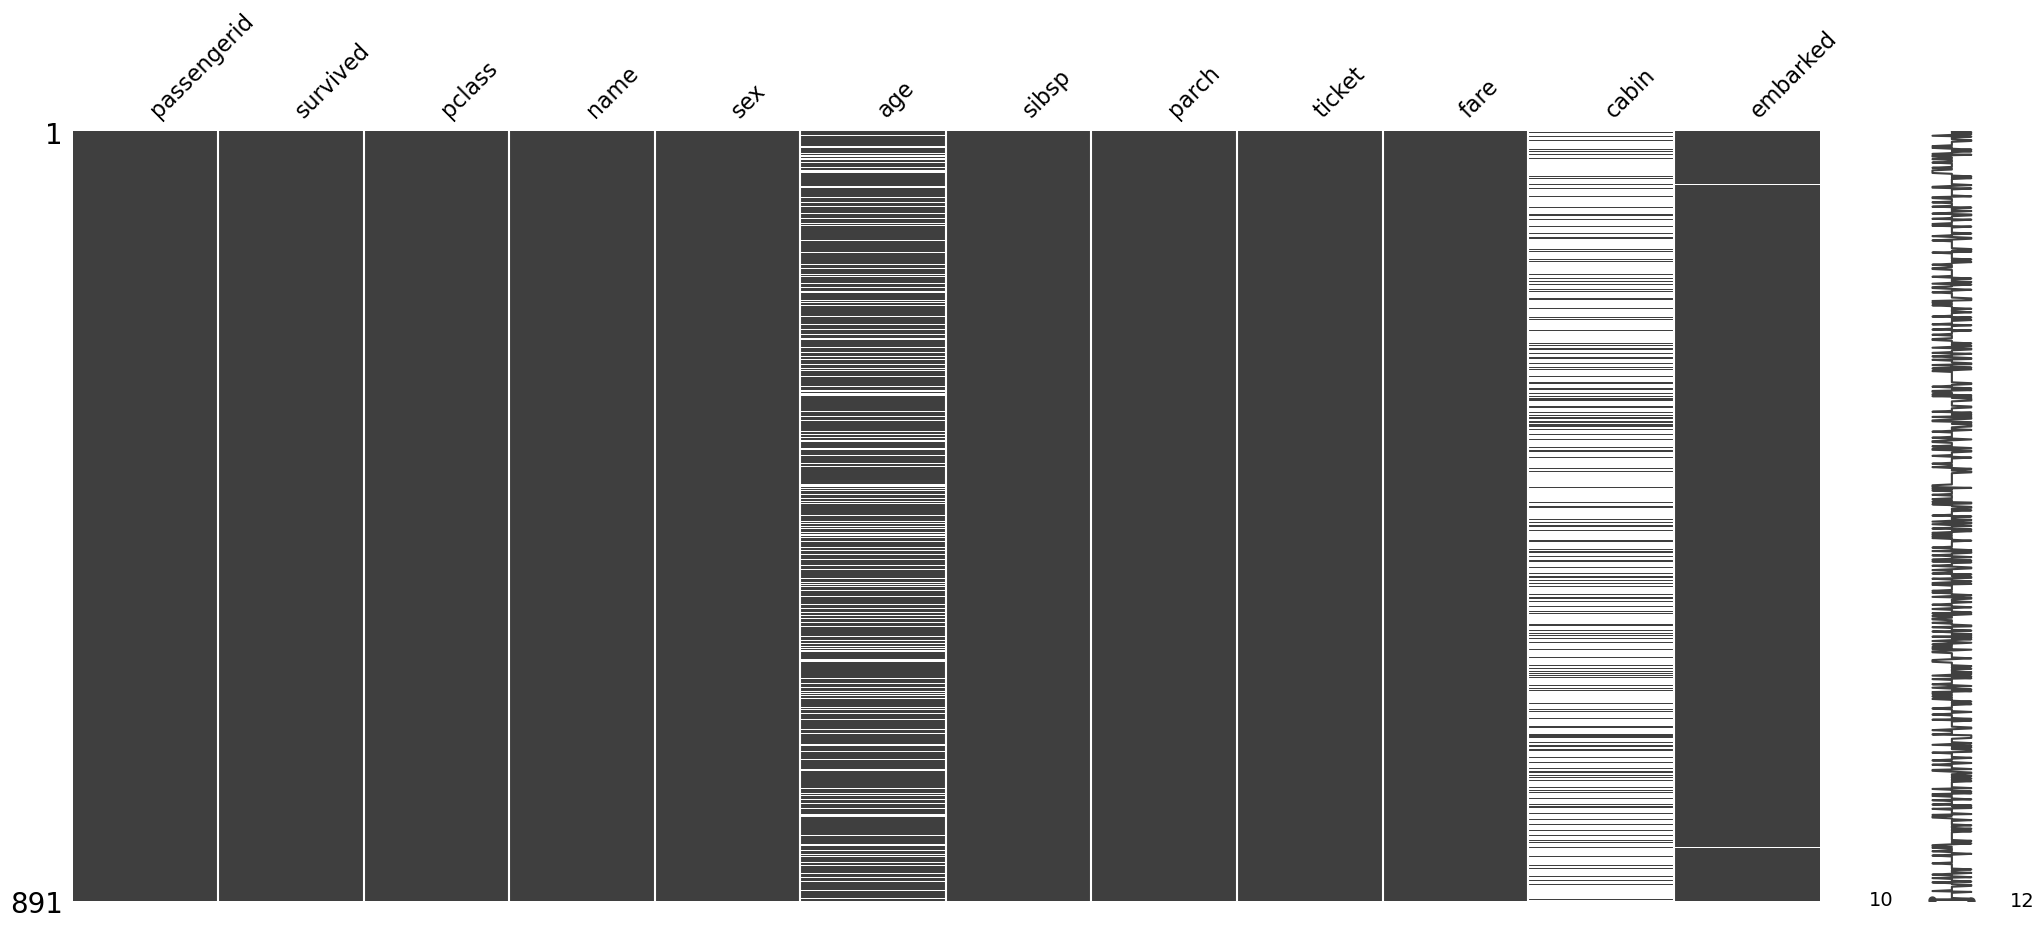

In [22]:
msno.matrix(df)
plt.savefig('C:\\Users\\divyashree\\OneDrive\\Documents\\elevate lab taks\\task 5', bbox_inches='tight', dpi=200)
msno.heatmap(df)
plt.savefig('C:\\Users\\divyashree\\OneDrive\\Documents\\elevate lab taks\\task 5', bbox_inches='tight', dpi=200)
plt.show()


In [26]:
#Convert dtypes (dates, categories)
# Convert categorical-looking columns to category dtype
for col in df.select_dtypes(include='object').columns:
    if df[col].nunique() < 30:   # heuristic
        df[col] = df[col].astype('category')


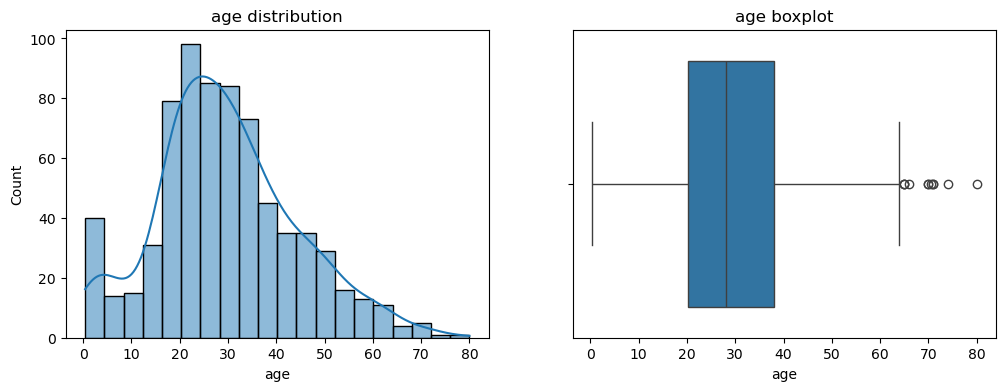

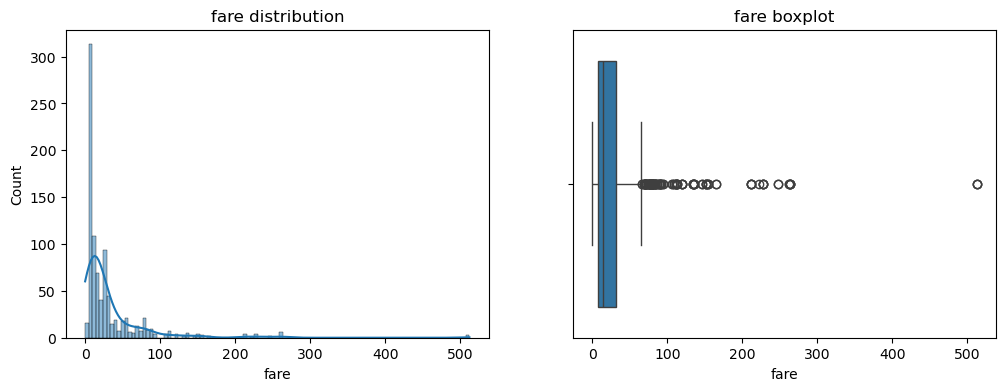

In [30]:
#Numeric histograms + boxplots
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in ['age','fare']:   # adapt to columns present
    if col in df.columns:
        plt.figure(figsize=(12,4))
        plt.subplot(1,2,1)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'{col} distribution')
        plt.subplot(1,2,2)
        sns.boxplot(x=df[col])
        plt.title(f'{col} boxplot')
        plt.savefig(f'C:\\Users\\divyashree\\OneDrive\\Documents\\elevate lab taks\\task 5', bbox_inches='tight', dpi=200)
        plt.show()


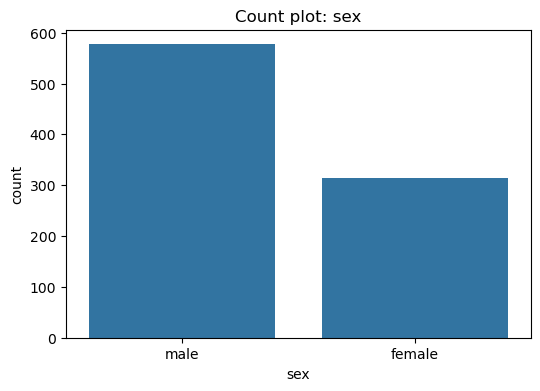

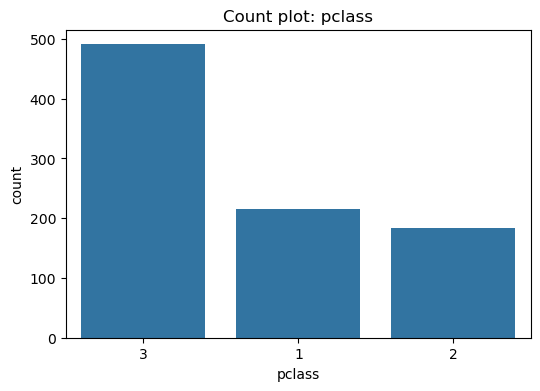

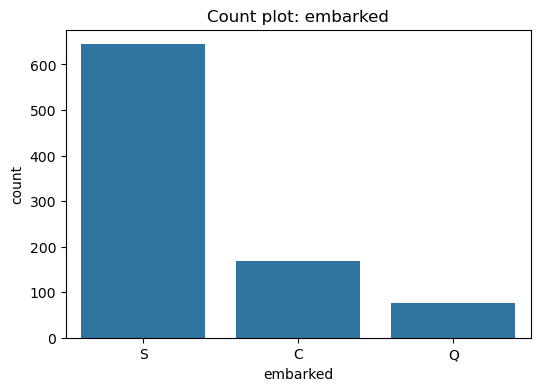

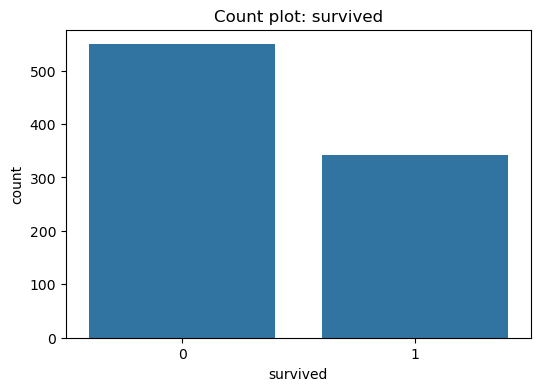

In [32]:
#Categorical counts
cat_cols = df.select_dtypes(include=['category','object']).columns.tolist()
for col in ['sex','pclass','embarked','survived']:  # adapt to dataset
    if col in df.columns:
        plt.figure(figsize=(6,4))
        order = df[col].value_counts().index
        sns.countplot(data=df, x=col, order=order)
        plt.title(f'Count plot: {col}')
        plt.savefig(f'C:\\Users\\divyashree\\OneDrive\\Documents\\elevate lab taks\\task 5', bbox_inches='tight', dpi=200)
        plt.show()


In [38]:
#Common Titanic strategy
# Example imputations (Titanic-like)
if 'age' in df.columns:
    if 'age' in df.columns:
     df['age'] = df.groupby(['pclass','sex'],observed=False)['age'].transform(lambda x: x.fillna(x.median()))
if 'embarked' in df.columns:
    df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
if 'fare' in df.columns:
    df['fare'] = df['fare'].fillna(df['fare'].median())

# Create binary feature for heavily missing columns like cabin
if 'cabin' in df.columns:
    df['has_cabin'] = df['cabin'].notnull().astype(int)


In [42]:
#Feature engineering (useful transforms)
# Family size
if {'sibsp','parch'}.issubset(df.columns):
    df['family_size'] = df['sibsp'] + df['parch'] + 1
    df['is_alone'] = (df['family_size'] == 1).astype(int)

# Extract title from name (Titanic)
if 'name' in df.columns:
    df['title'] = df['name'].str.extract(r'([A-Za-z]+)\.', expand=False)
    df['title'] = df['title'].replace(['Mlle','Ms','Mme'],'Miss')
    df['title'] = df['title'].apply(lambda x: x if x in ['Mr','Mrs','Miss','Master'] else 'Other')


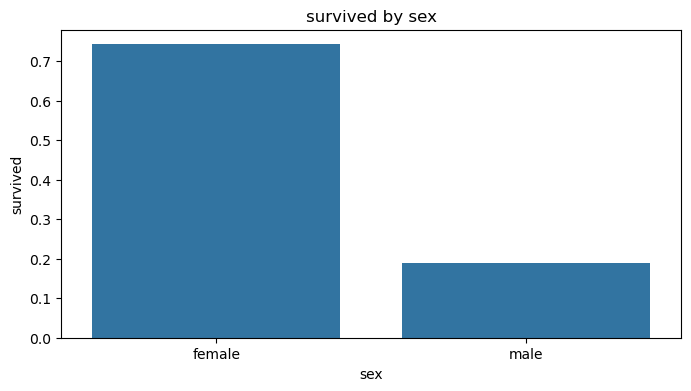

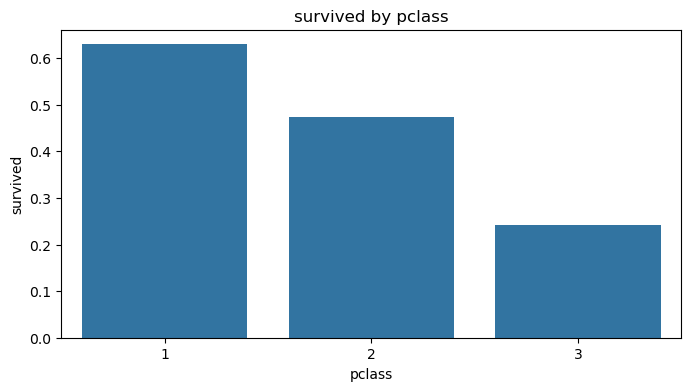

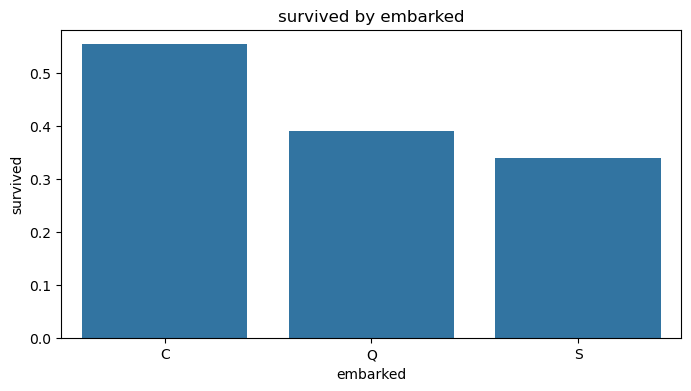

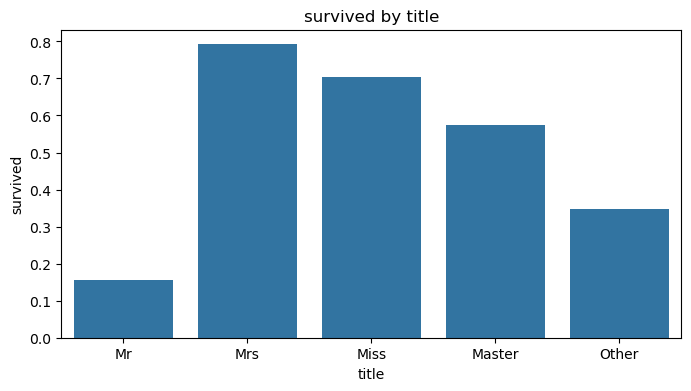

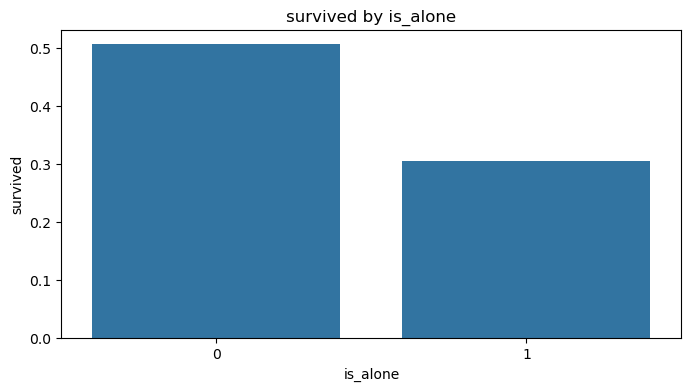

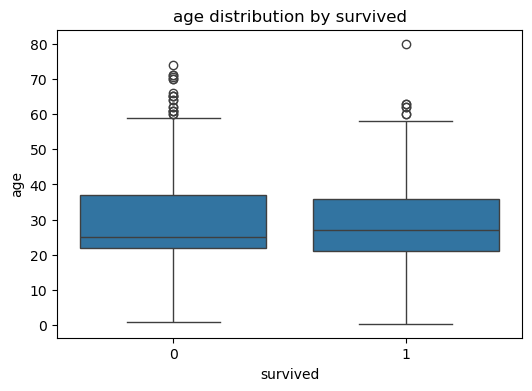

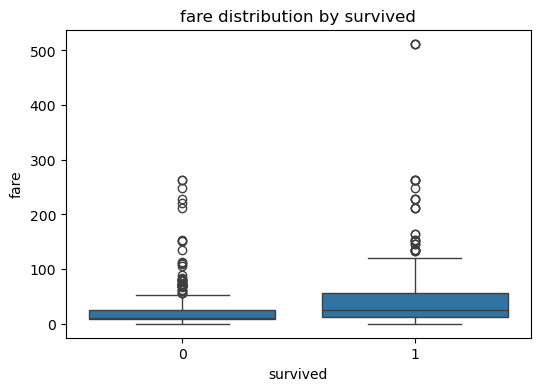

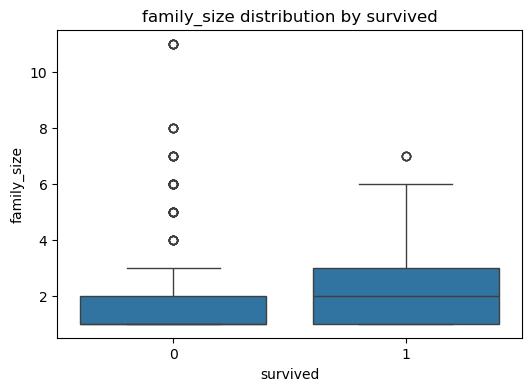

In [46]:
#Bivariate analysis (target vs features)
target = 'survived'   # change to your target column
if target in df.columns:
    # Categorical vs target
    for col in ['sex','pclass','embarked','title','is_alone']:
        if col in df.columns:
            plt.figure(figsize=(8,4))
            sns.barplot(x=col, y=target, data=df, errorbar=None, estimator=np.mean)
            plt.title(f'{target} by {col}')
            plt.savefig(f'C:\\Users\\divyashree\\OneDrive\\Documents\\elevate lab taks\\task 5', bbox_inches='tight', dpi=200)
            plt.show()
    # Numeric vs target
    for col in ['age','fare','family_size']:
        if col in df.columns:
            plt.figure(figsize=(6,4))
            sns.boxplot(x=target, y=col, data=df)
            plt.title(f'{col} distribution by {target}')
            plt.savefig(f'C:\\Users\\divyashree\\OneDrive\\Documents\\elevate lab taks\\task 5', bbox_inches='tight', dpi=200)
            plt.show()


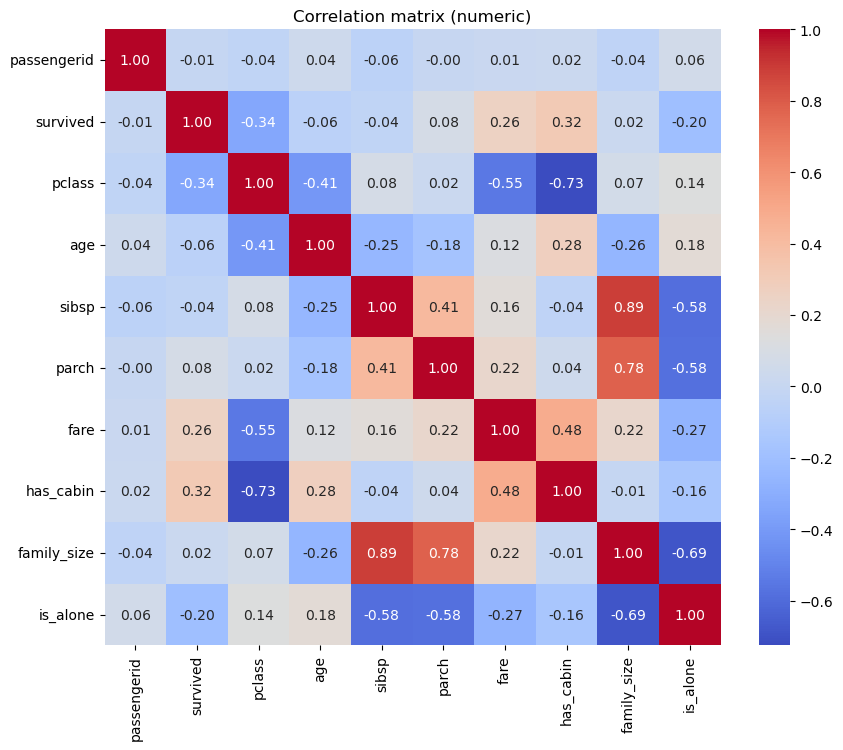

In [48]:
#Correlation & multivariate analysis
# Correlation matrix (numeric)
num_df = df.select_dtypes(include=[np.number])
corr = num_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation matrix (numeric)')
plt.savefig('C:\\Users\\divyashree\\OneDrive\\Documents\\elevate lab taks\\task 5', bbox_inches='tight', dpi=200)
plt.show()


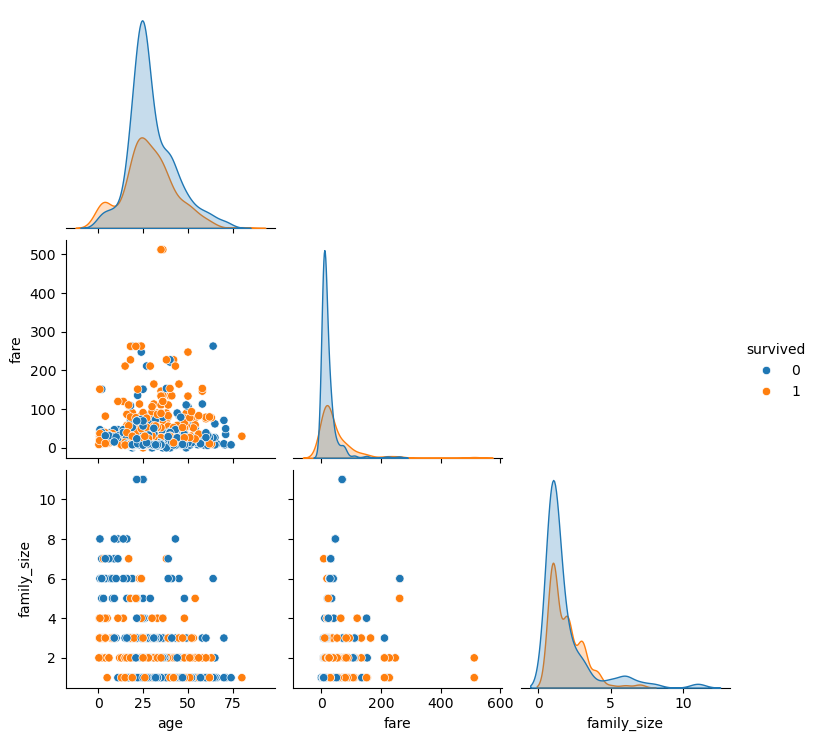

In [50]:
cols = ['age','fare','family_size', target]
cols = [c for c in cols if c in df.columns]
sns.pairplot(df[cols].dropna(), hue=target, diag_kind='kde', corner=True)
plt.savefig('C:\\Users\\divyashree\\OneDrive\\Documents\\elevate lab taks\\task 5', bbox_inches='tight', dpi=200)
plt.show()


In [52]:
#Multicollinearity detection (VIF)
# Prepare numeric matrix for VIF (drop NA)
X = df.select_dtypes(include=[np.number]).drop(columns=[target], errors='ignore').dropna()
X_const = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]
vif_data.sort_values('VIF', ascending=False)


C:\Users\divyashree\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\divyashree\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
4,sibsp,inf
5,parch,inf
8,family_size,inf
2,pclass,2.779621
7,has_cabin,2.168982
9,is_alone,2.097761
6,fare,1.618458
3,age,1.313374
1,passengerid,1.008039
0,const,0.000000


In [54]:
#Statistical tests
if {'sex', target}.issubset(df.columns):
    ct = pd.crosstab(df['sex'], df[target])
    chi2, p, dof, expected = chi2_contingency(ct)
    print('Chi-square p-value (sex vs target):', p)

if 'age' in df.columns and target in df.columns:
    grp0 = df[df[target]==0]['age'].dropna()
    grp1 = df[df[target]==1]['age'].dropna()
    tstat, pval = ttest_ind(grp0, grp1, nan_policy='omit')
    print('t-test p-value (age by target):', pval)



Chi-square p-value (sex vs target): 1.1973570627755645e-58
t-test p-value (age by target): 0.07548530586360941


fare skew: 4.787316519674893
age skew: 0.5340834483875482


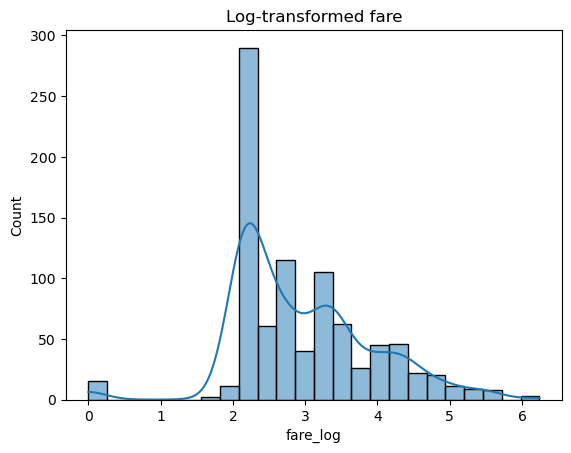

In [58]:
#Handling skew & outliers
# Check skew
for col in ['fare','age']:
    if col in df.columns:
        print(col, 'skew:', df[col].dropna().skew())

# Log transform fare if skewed
if 'fare' in df.columns:
    df['fare_log'] = np.log1p(df['fare'])
    sns.histplot(df['fare_log'].dropna(), kde=True)
    plt.title('Log-transformed fare')
    plt.savefig('C:\\Users\\divyashree\\OneDrive\\Documents\\elevate lab taks\\task 5', bbox_inches='tight', dpi=200)
    plt.show()

def remove_outliers_iqr(series, k=1.5):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - k * iqr
    upper = q3 + k * iqr
    return series.where(series.between(lower, upper))

if 'fare' in df.columns:
    df['fare_iqr_removed'] = remove_outliers_iqr(df['fare'])



In [64]:
df.to_csv("C:\\Users\\divyashree\\OneDrive\\Documents\\elevate lab taks\\task 5\\cleaned dataset.csv", index=False)
# Save a few key figures (already saved above with plt.savefig). Confirm files:
import glob
print(sorted(glob.glob('C:\\Users\\divyashree\\OneDrive\\Documents\\elevate lab taks\\task 5\\figures'))[:10])


['C:\\Users\\divyashree\\OneDrive\\Documents\\elevate lab taks\\task 5\\figures']
